# Problem 1

## Task 1

In [1]:
import data_collection_311

In [2]:
full_df = data_collection_311.load_full_data()

## Task 2

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

Text(0.5,1,'Service Request Frequency by Month and Type')

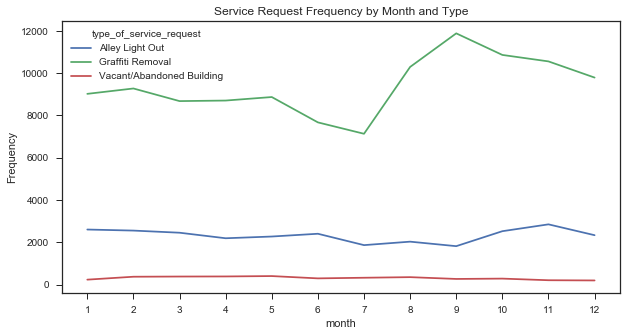

In [38]:
over_time = data_collection_311.summary_statistics(full_df, 'type_of_service_request', 'month')
over_time

sns.set_style('ticks')
plot = over_time.plot(figsize=(10,5))
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('Frequency')
plt.title('Service Request Frequency by Month and Type')

Text(0.5,1,'Service Request Frequency by Community and Type')

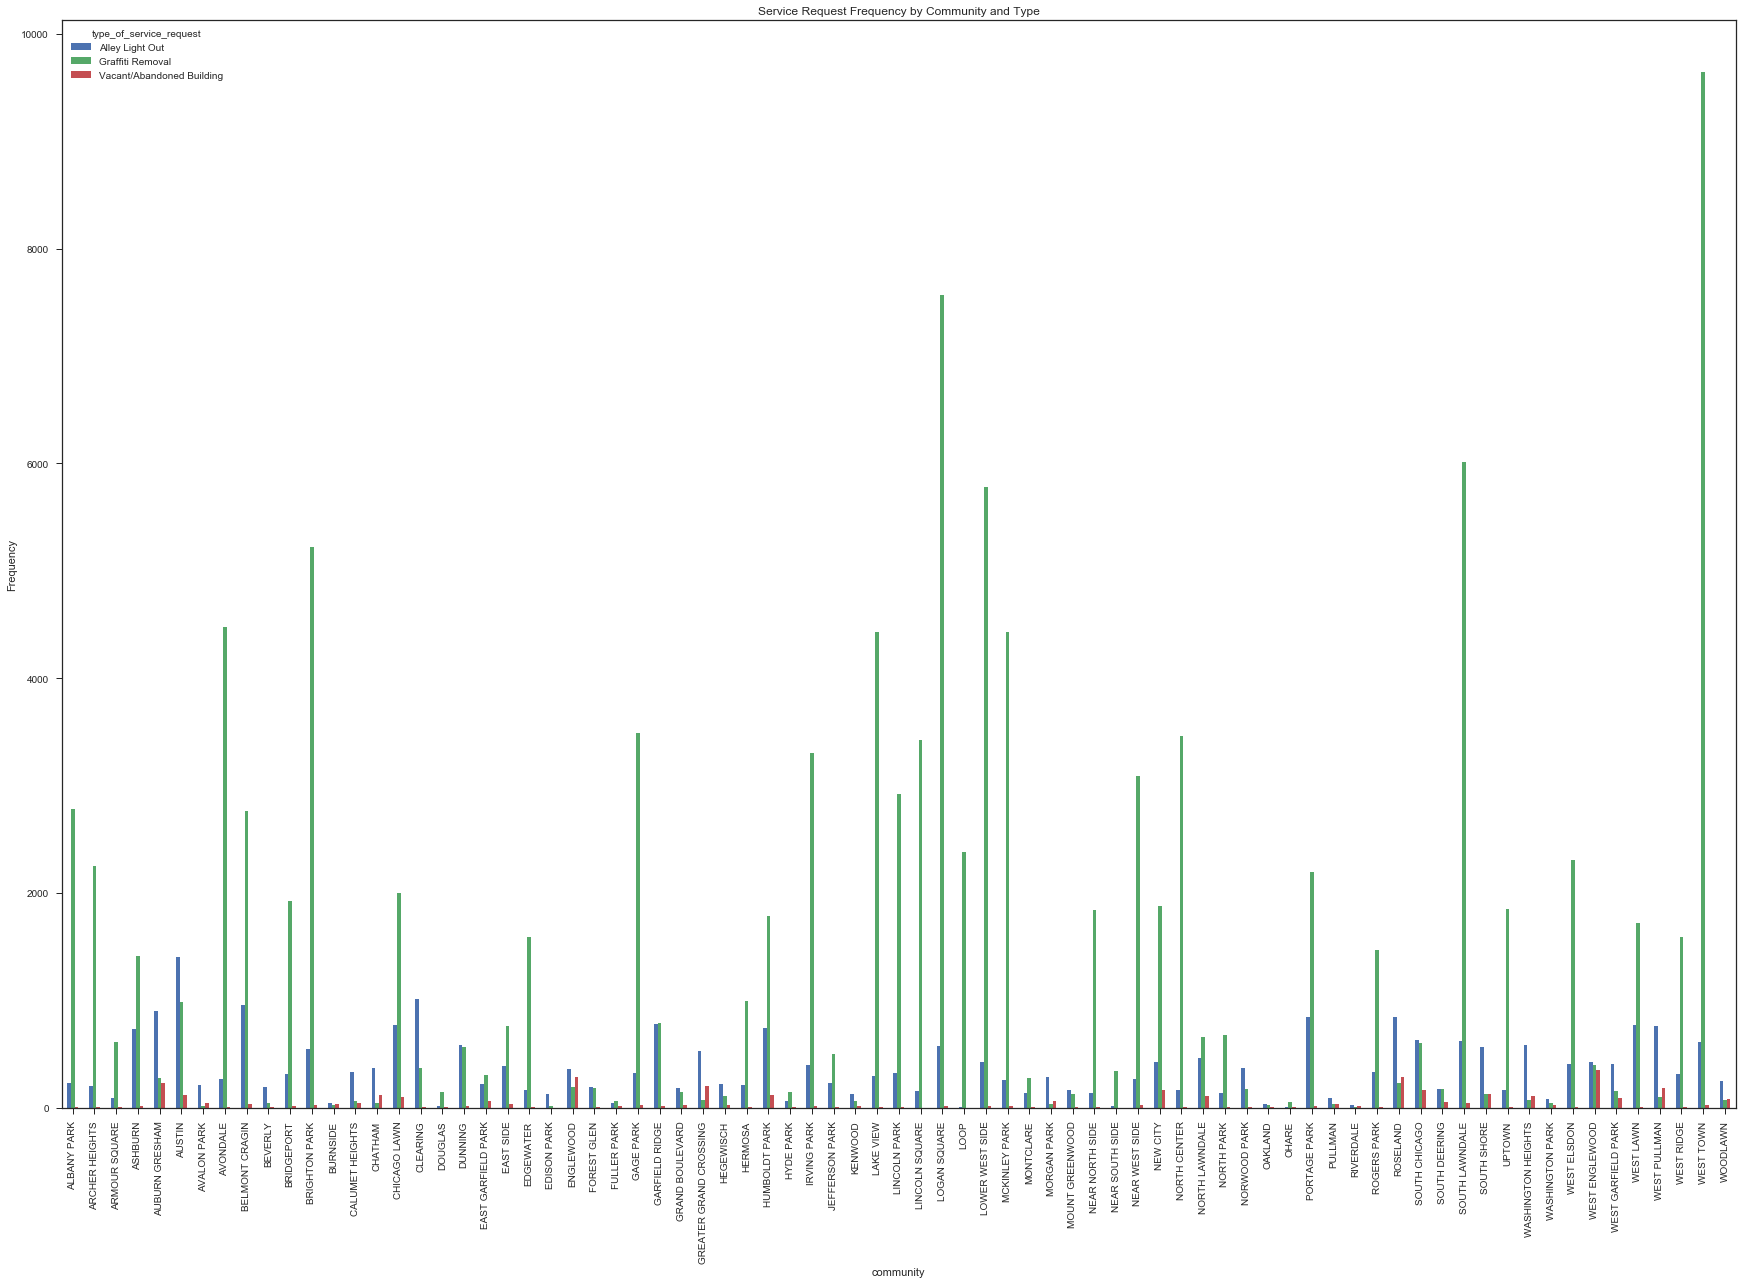

In [53]:
by_community = data_collection_311.summary_statistics(full_df, 'type_of_service_request', 'community')
by_community
by_community.plot(figsize=(30,20), kind='bar')
plt.ylabel('Frequency')
plt.title('Service Request Frequency by Community and Type')

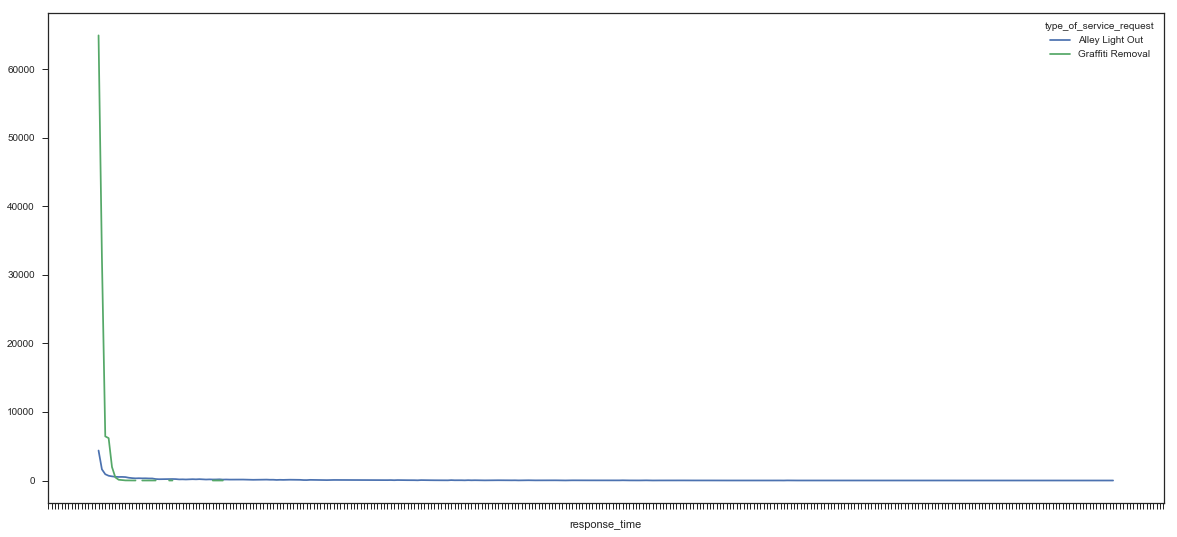

In [50]:
by_response_time = data_collection_311.summary_statistics(full_df, 'type_of_service_request', 'response_time')
by_response_time
plot = by_response_time.plot(figsize=(20,10))
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))